# Understanding Logistic Regression & Decision Trees!

This notebook aims at understanding how a Logistic Regression & Decision Tree is built using the dataset with discrete output. It focuses on models with a categorical target and continuous features.

Technical Description

- Python: 3.6

- Libraries: Pandas, Numpy, Matplotlib, Seaborn, Sklearn Graphviz, Pydotplus

- Dataset: Social Media Advertisement

- Problem Statement: A social network has tied up with a car company to display ads of car to it's user. The Dataset contains the information about user and we have to predict if the particular user has purchased the car or not.

![ads.png](Facebook_Ad_mobile3.png)

## 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus

/home/murtuza/anaconda3/envs/idp3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2- Loading the data

In [3]:
df = pd.read_csv('/home/murtuza/Downloads/Materials/ITS/Logistics Regression/13-Logistic-Regression/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3- Data exploration

### Describe the dataset

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check if any null values in the data sets

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Check if any Duplicate values in the datasets

In [6]:
len(df[df.duplicated()])

0

- so there is *NO* `null values` and `duplicates` in given data sets

#### Multivariate Analysis

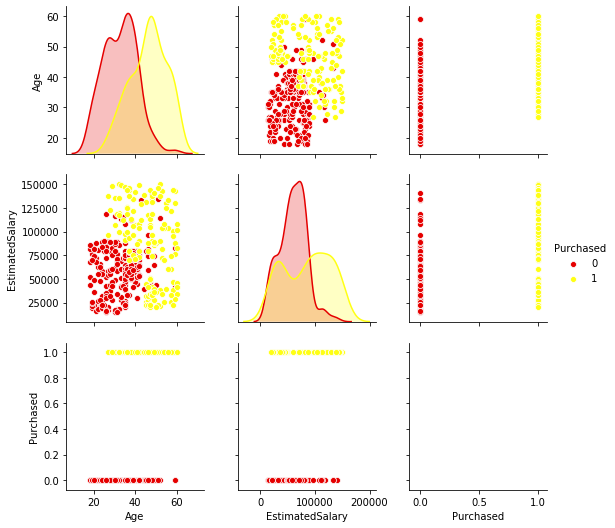

In [7]:
colors = ['red', 'yellow']
sns.pairplot(df.drop('User ID',axis=1), hue='Purchased', palette=sns.xkcd_palette(colors))
plt.show()

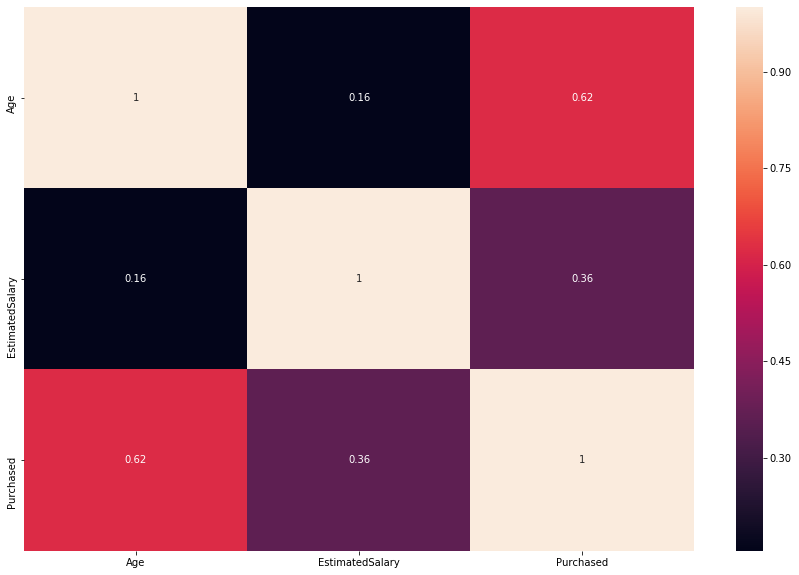

In [8]:
plt.figure(figsize=(15, 10))
corr = df.drop("User ID",axis=1).corr()
sns.heatmap(corr, annot=True)

plt.show()

## 4- Preparing the data

### Feature selection

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

- Since `User id` does not give any values, so we can drop this column

- `Gender` is a string datatype. So for simplicity in modelling, we'll drop it too

In [10]:
features = ['Age', 'EstimatedSalary']
X = df[features]
y = df['Purchased']


### Splitting into training and testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [12]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5- Modeling

### Choosing a model

In [13]:
model = LogisticRegression()

### Training

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## 6- Evaluating the model

In [15]:
y_pred = model.predict(X_test)

### Accuracy

In [16]:
accuracy_score(y_test, y_pred)

0.89

The accuracy is not very good but it is not what interests us in this notebook. Btw, we only choose two variables. Let's see for which classes the model makes mistakes.

### Confusion matrix

In [17]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,65,3,68
1,8,24,32
All,73,27,100


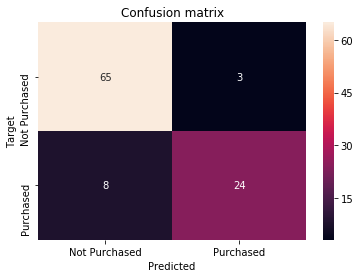

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased','Purchased'], 
            yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

We can see that the 11 targets were misclassified

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



### Understanding Classification Report

![image.png](Class_report.png)

- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.


- true negatives (TN): We predicted no, and they don't have the disease.


- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")


- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


- Accuracy: Overall, how often is the classifier correct?
    - (TP+TN)/total = (100+50)/165 = 0.91


- Misclassification Rate: Overall, how often is it wrong?
    - (FP+FN)/total = (10+5)/165 = 0.09
    - equivalent to 1 minus Accuracy
    - also known as "Error Rate"


- True Positive Rate: When it's actually yes, how often does it predict yes?
    - TP/actual yes = 100/105 = 0.95
    - also known as "Sensitivity" or "Recall"


- False Positive Rate: When it's actually no, how often does it predict yes?
    - FP/actual no = 10/60 = 0.17


- True Negative Rate: When it's actually no, how often does it predict no?
    - TN/actual no = 50/60 = 0.83
    - equivalent to 1 minus False Positive Rate
    - also known as "Specificity"


- Precision: When it predicts yes, how often is it correct?
    - TP/predicted yes = 100/110 = 0.91


- F Score: This is a weighted average of the recall and precision
    - (2 * recall * precision) / (recall + precision)

## 7- Decision Trees

#### Now let's see how we can improve results using Decision Trees

In [20]:
model_dt = DecisionTreeClassifier()

In [21]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_pred = model_dt.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9

In [24]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,62,6,68
1,4,28,32
All,66,34,100


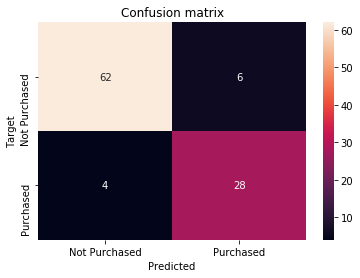

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased','Purchased'], 
            yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

   micro avg       0.90      0.90      0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



## 8- Understanding how the tree model builds its decision
Having a good prediction is interesting but understanding how the model has built its predicting path is essential. <br/>
In the following section, we will study the previous given graph step by step for each depth of the graph. <br/>
After this section you will be able to :
*  decrypt a decision tree
*  understand the concept of decision boundary


### Tree graph

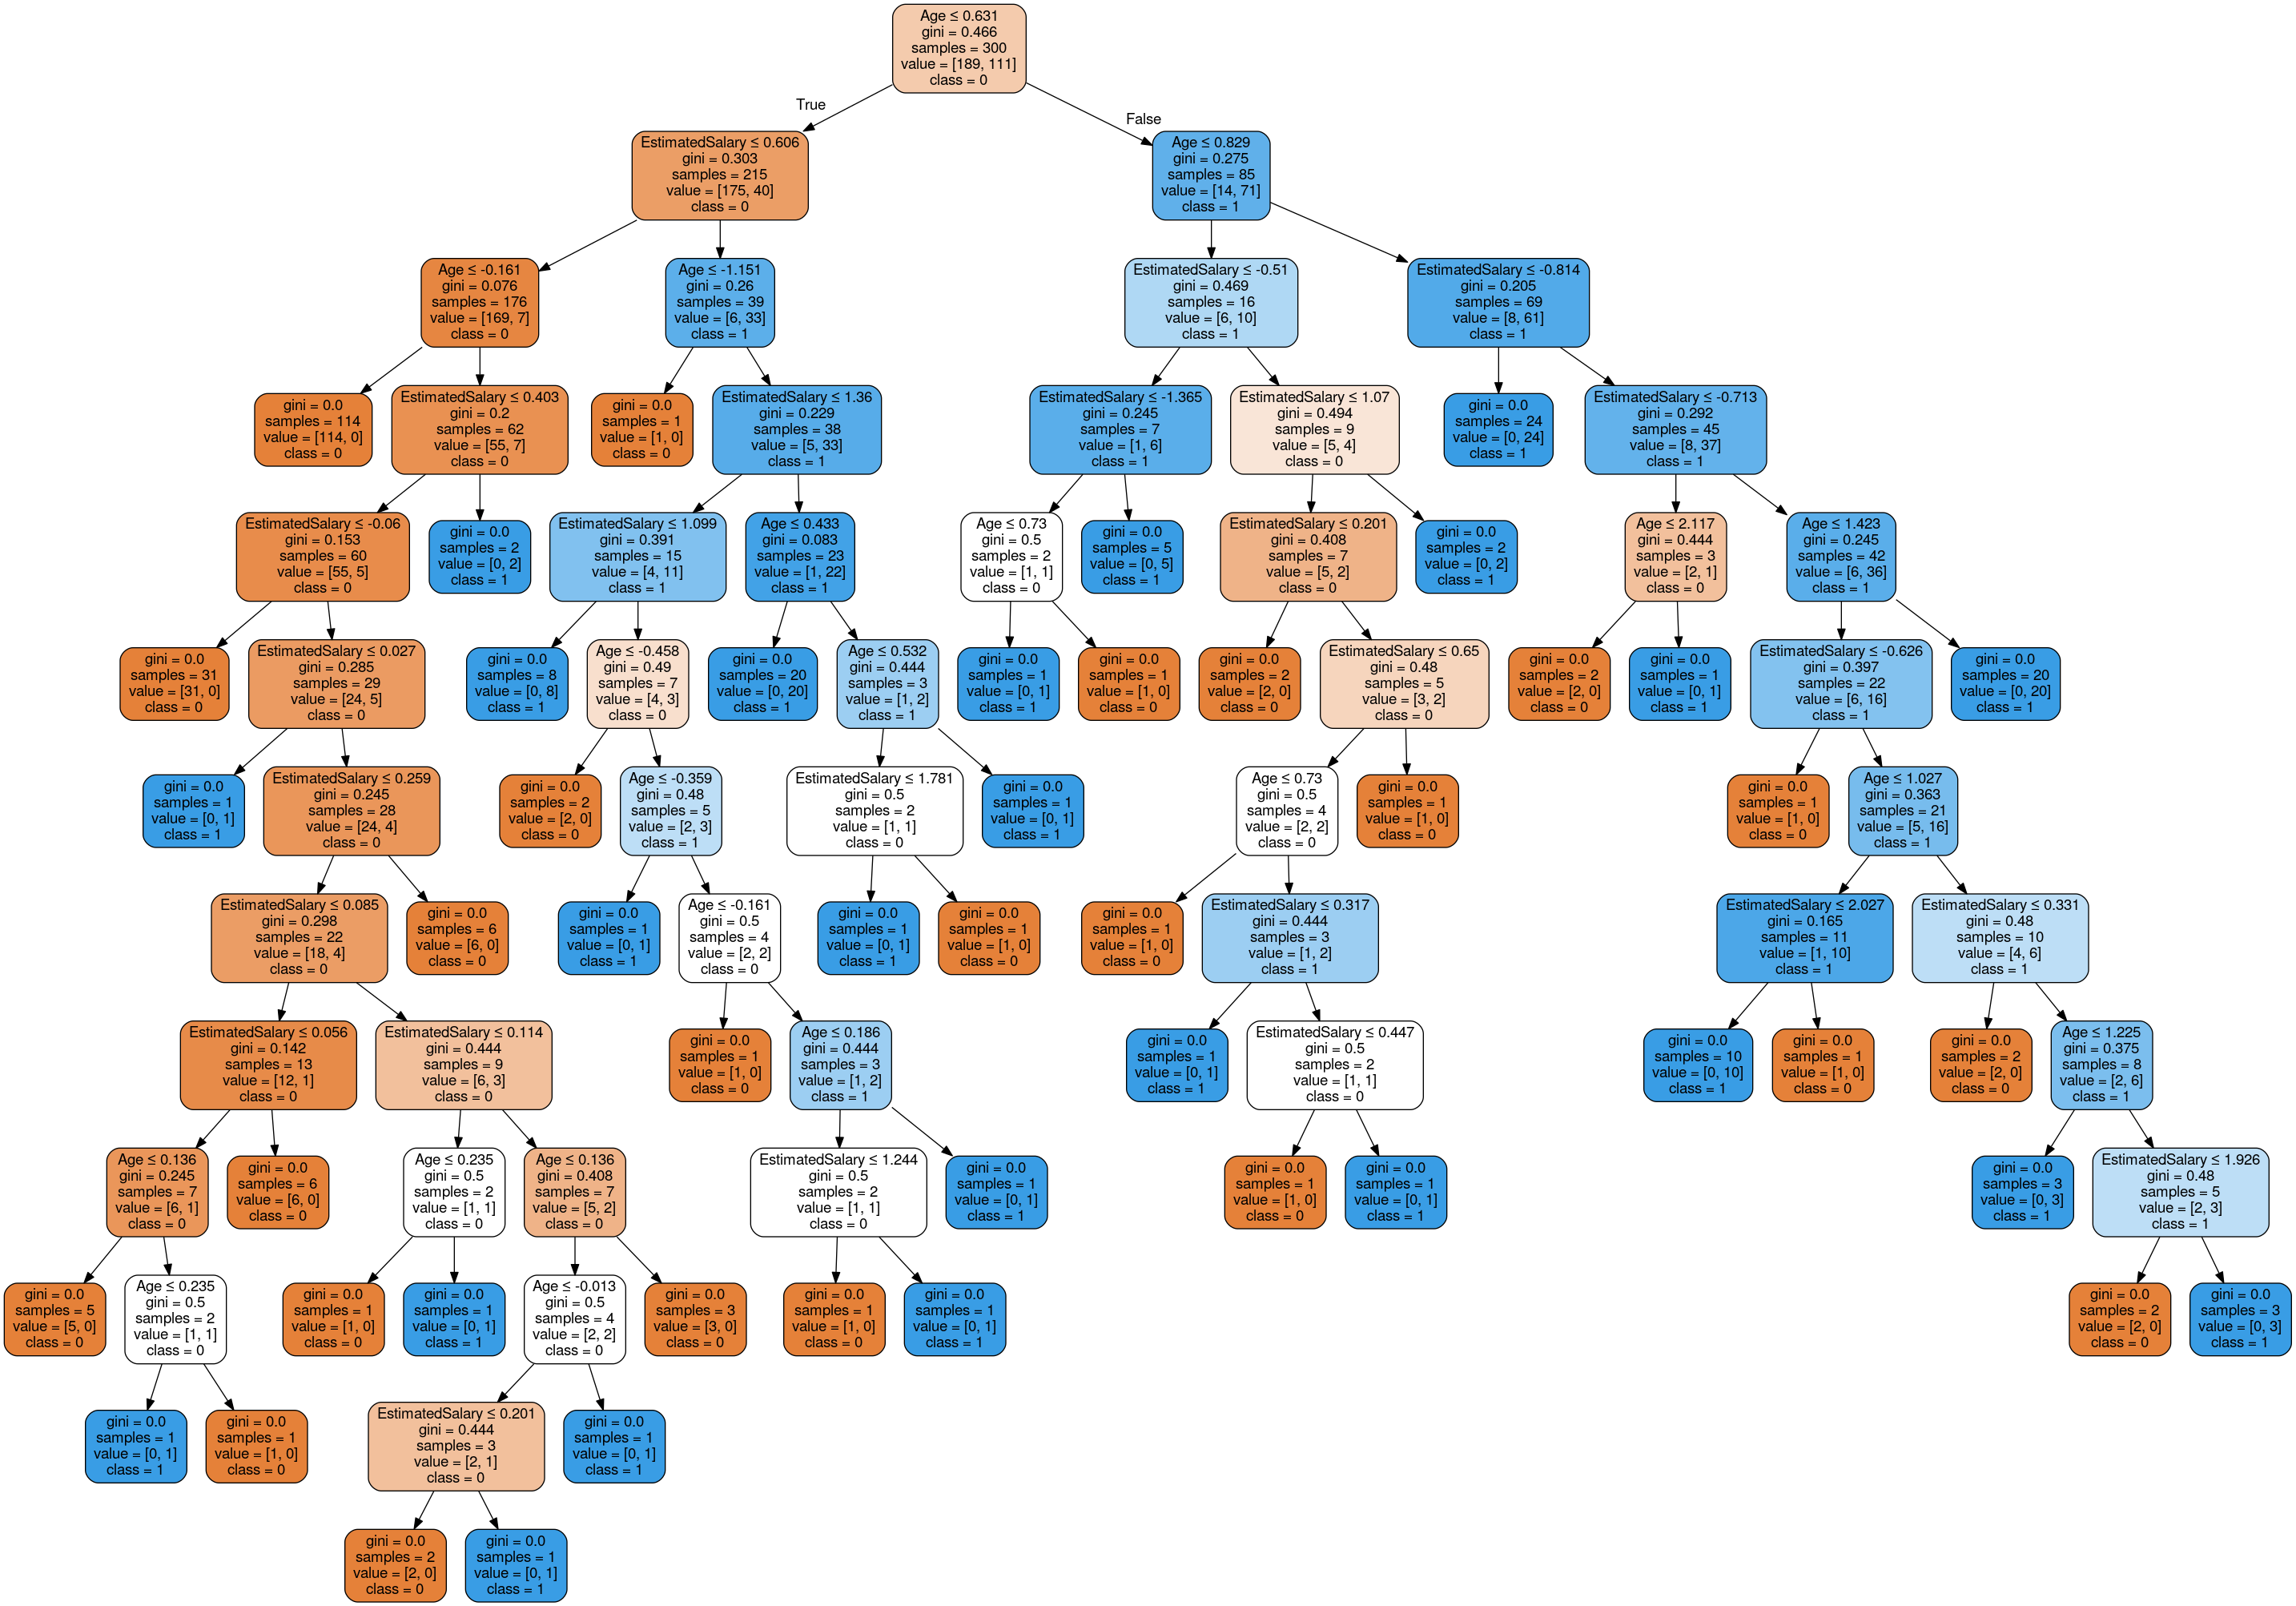

In [27]:
#Printing the Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols_name = ['Age', 'EstimatedSalary']

tree_data = StringIO()
export_graphviz(model_dt, out_file = tree_data, filled = True, rounded = True, 
               special_characters = True, feature_names = feature_cols_name, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(tree_data.getvalue())
graph.write_png('socialMediaAd')
Image(graph.create_png())

## 9- Pruning

- `criterion="entropy"` and `max_depth=3`


- `max_depth`: If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 


- The `higher` value of maximum depth causes `overfitting`, and a `lower value` causes `underfitting`


- `criterion`: `entropy` for the information gain.


In [28]:
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [29]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_pred = model_dt.predict(X_test)

### Analysing the tree

In [31]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.94


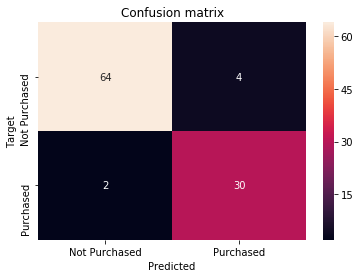

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased','Purchased'], 
            yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

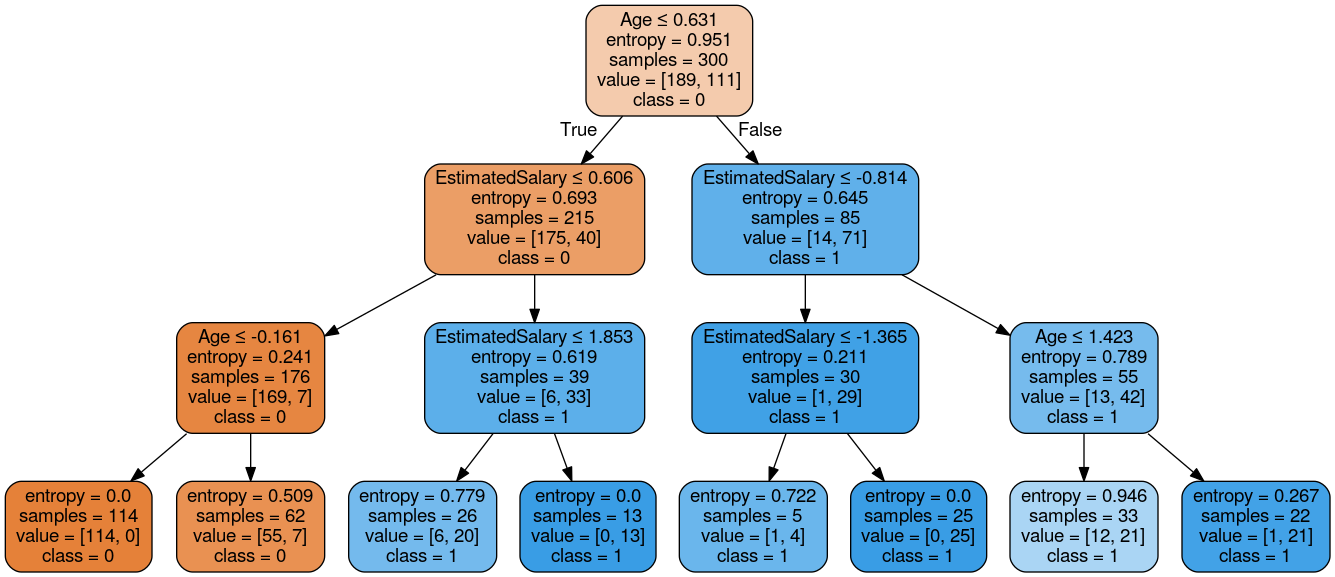

In [33]:
dot_data = StringIO()
export_graphviz(model_dt, out_file = dot_data, filled = True, 
                rounded = True, 
                special_characters = True, feature_names = feature_cols_name, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('socialMediaAd_pruning')
Image(graph.create_png())


#### Above matrix shows clearly that after pruning performance of the model has increased a lot from `90%` to `94%`
